In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("creditcard.csv")

# Exploratory Data Analysis

In [3]:
data.shape

(284807, 31)

In [4]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
cor1= data.corr() 

<AxesSubplot:>

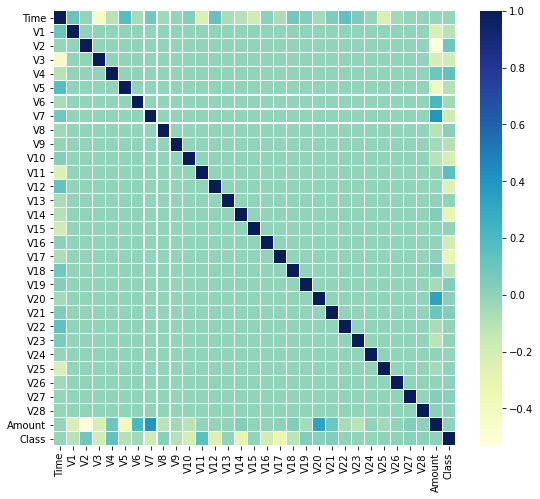

In [7]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cor1, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# DATA PREPROCESSING

In [8]:
data.dtypes == object
# Checking for Character Data Type

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [9]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
data.std() 
#Checking for Variance 

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

In [11]:
data.isnull().sum()
# To check whether the dataset has missing values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

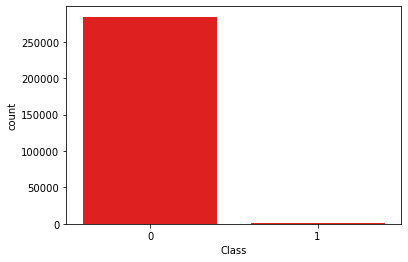

In [13]:
sns.countplot(x= "Class", data = data, color = "red")
#checking for imbalance on the dependent Variable 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


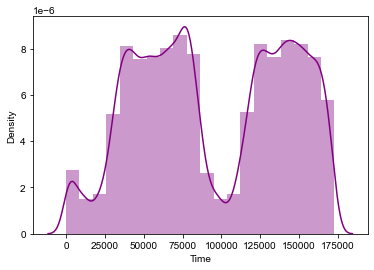

In [14]:
sns.distplot(data["Time"], bins = 20, color = "purple")
sns.set(style = "darkgrid")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


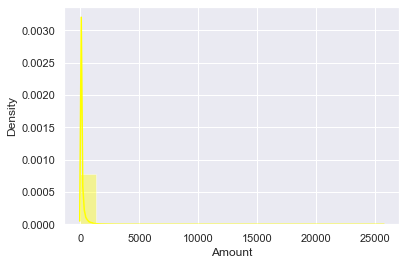

In [15]:
sns.distplot(data["Amount"], bins = 20 , color = "yellow")
sns.set(style = "white")

# Standardization of Continuous Variables 

In [16]:
from sklearn import preprocessing 
# Scaling the numerical Values as they are in different scales

In [17]:
numerical_val = list(set(data[["Time","Amount"]]))

In [18]:
new_col = [i+ "_ Standardized" for i in numerical_val]

In [19]:
array = data[numerical_val].values

In [20]:
data_scaler = preprocessing.StandardScaler().fit(array)

In [21]:
data[new_col] = pd.DataFrame(data_scaler.transform(array))

In [22]:
data.columns # New standardized columns are added 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_ Standardized', 'Amount_ Standardized'],
      dtype='object')

In [23]:
data = data.drop(numerical_val, axis =1) 

In [24]:
data.mean()

V1                      3.918649e-15
V2                      5.682686e-16
V3                     -8.761736e-15
V4                      2.811118e-15
V5                     -1.552103e-15
V6                      2.040130e-15
V7                     -1.698953e-15
V8                     -1.893285e-16
V9                     -3.147640e-15
V10                     1.772925e-15
V11                     9.289524e-16
V12                    -1.803266e-15
V13                     1.674888e-15
V14                     1.475621e-15
V15                     3.501098e-15
V16                     1.392460e-15
V17                    -7.466538e-16
V18                     4.258754e-16
V19                     9.019919e-16
V20                     5.126845e-16
V21                     1.473120e-16
V22                     8.042109e-16
V23                     5.282512e-16
V24                     4.456271e-15
V25                     1.426896e-15
V26                     1.701640e-15
V27                    -3.662252e-16
V

In [25]:
round(3.202236e-16) #Mean of the new standardised variable should be zero

0

In [26]:
round(-1.050379e-14)

0

In [27]:
data["Amount_ Standardized"].std()

1.0000017555792826

In [28]:
data["Time_ Standardized"].std()

1.0000017555794558

In [29]:
# Splitting up the data Randomly 

In [30]:
from sklearn.model_selection import train_test_split
input_vari = list(set(data.columns)- set(["Class"]))
X = data[input_vari]
Y = data["Class"]

In [31]:
X

,V28,V6,V13,V8,V14,V15,V20,V25,V3,V7,...,V12,V16,V10,V26,V22,V5,V19,V27,V4,V23
0,-0.021053,0.462388,-0.991390,0.098698,-0.311169,1.468177,0.251412,0.128539,2.536347,0.239599,...,-0.617801,-0.470401,0.090794,-0.189115,0.277838,-0.338321,0.403993,0.133558,1.378155,-0.110474
1,0.014724,-0.082361,0.489095,0.085102,-0.143772,0.635558,-0.069083,0.167170,0.166480,-0.078803,...,1.065235,0.463917,-0.166974,0.125895,-0.638672,0.060018,-0.145783,-0.008983,0.448154,0.101288
2,-0.059752,1.800499,0.717293,0.247676,-0.165946,2.345865,0.524980,-0.327642,1.773209,0.791461,...,0.066084,-2.890083,0.207643,-0.139097,0.771679,-0.503198,-2.261857,-0.055353,0.379780,0.909412
3,0.061458,1.247203,0.507757,0.377436,-0.287924,-0.631418,-0.208038,0.647376,1.792993,0.237609,...,0.178228,-1.059647,-0.054952,-0.221929,0.005274,-0.010309,-1.232622,0.062723,-0.863291,-0.190321
4,0.215153,0.095921,1.345852,-0.270533,-1.119670,0.175121,0.408542,-0.206010,1.548718,0.592941,...,0.538196,-0.451449,0.753074,0.502292,0.798278,-0.407193,0.803487,0.219422,0.403034,-0.137458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.823731,-2.606837,-0.689256,7.305334,4.626942,-0.924459,1.475829,1.436807,-9.834783,-4.918215,...,2.711941,1.107641,4.356170,0.250034,0.111864,-5.364473,-0.682920,0.943651,-2.066656,1.014480
284803,-0.053527,1.058415,1.214756,0.294869,-0.675143,1.164931,0.059616,-0.606624,2.035030,0.024330,...,0.915802,-0.711757,-0.975926,-0.395255,0.924384,0.868229,-1.545556,0.068472,-0.738589,0.012463
284804,-0.026561,3.031260,-0.183699,0.708417,-0.510602,1.329284,0.001396,0.265745,-3.249640,-0.296827,...,0.063119,0.140716,-0.484782,-0.087371,0.578229,2.630515,-0.577252,0.004455,-0.557828,-0.037501
284805,0.104533,0.623708,-1.042082,0.679145,0.449624,1.962563,0.127434,-0.569159,0.702510,-0.686180,...,-0.962886,-0.608577,-0.399126,0.546668,0.800049,-0.377961,2.897849,0.108821,0.689799,-0.163298


In [32]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 60)

In [34]:
X_train

,V28,V6,V13,V8,V14,V15,V20,V25,V3,V7,...,V12,V16,V10,V26,V22,V5,V19,V27,V4,V23
19882,0.019545,-0.849912,0.063098,-0.117419,0.076379,0.015495,0.214134,0.414817,0.450127,-0.508023,...,0.159828,1.249910,0.770816,-0.244891,0.463601,-1.172713,0.707894,-0.012273,-0.656490,-0.092708
28627,0.376354,-0.944462,1.540066,-0.332107,-0.775479,0.322808,0.205705,-0.057352,0.169687,0.855199,...,0.845622,0.254932,1.730961,0.090911,0.090349,-0.580318,-0.895217,-0.902677,-0.792852,0.113117
252282,-0.023058,-1.438944,-0.174029,-0.496164,0.603560,1.134597,-0.288116,0.297133,-2.307854,0.156930,...,0.309101,-2.868543,-0.450475,-0.743797,-0.100191,-0.549855,0.238295,-0.000465,-2.651533,-0.060454
283094,1.240884,-1.112216,0.837591,3.746472,0.303558,-0.837132,3.406673,1.492283,-6.591644,-2.164932,...,2.152466,0.660813,8.319900,0.295328,-1.425127,-3.135762,-0.428189,2.177236,-2.460064,0.660345
201431,0.500579,7.801221,-1.597984,-16.942606,2.856969,0.747486,4.412495,-0.018582,-2.184592,-9.120091,...,1.987735,1.390717,-4.162672,-0.360751,2.958235,0.423311,-1.423249,-0.005474,-0.978949,1.255257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-0.043576,0.113723,1.510768,0.175389,-0.812430,0.173482,0.065773,-0.403562,0.234969,-1.656851,...,0.676295,1.957444,0.854955,-0.102502,1.507397,-1.433077,0.427254,0.058842,-1.009783,0.149724
64162,-0.030211,0.985436,-0.029949,0.840939,0.762662,2.043929,-0.302997,-0.495253,0.739050,0.002159,...,0.563880,-1.511864,-0.551364,-0.219312,0.977923,0.401660,-1.329392,0.030910,0.857215,0.093360
174179,-0.098112,0.750053,0.232185,0.052156,0.565906,0.066012,-0.036445,0.315080,-2.583758,-0.087291,...,0.117809,-0.023609,0.948242,0.158558,1.293620,1.135523,0.139524,-0.041218,-1.422633,-0.064980
268687,-0.062229,-1.245778,-1.061793,-0.271768,0.499747,0.162736,-0.296357,-0.337683,-1.084477,0.108868,...,-0.156386,-0.055036,0.106223,0.199131,-0.789625,-0.248828,0.150298,-0.078106,0.429631,0.354650


In [35]:
Y_train

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

In [36]:
X1= pd.DataFrame(X_train, columns = input_vari)
Y1 = pd.DataFrame(Y_train, columns = ["Class"])
data_train = pd.concat([X1,Y1], axis = 1)

In [37]:
data_train.shape #Shape Before SMOTE

(199364, 31)

In [38]:
data.shape # Original Data Shape

(284807, 31)

In [39]:
data_train.to_csv("data_train_before_smote.csv") 

In [40]:
X_test

,V28,V6,V13,V8,V14,V15,V20,V25,V3,V7,...,V12,V16,V10,V26,V22,V5,V19,V27,V4,V23
259433,-0.331451,1.581294,0.165142,-0.865043,-1.484028,-0.299823,0.115547,0.242397,3.110827,-0.317032,...,0.247109,-1.728057,0.223917,-0.119337,0.207495,-0.689090,2.853027,-0.141732,2.324735,-0.281702
227002,-0.291331,-0.346329,-1.409582,0.075183,1.215360,0.506785,-0.401661,0.733008,-0.865200,1.457932,...,-0.317460,-2.026251,-0.911713,-0.135713,1.455308,1.961462,-1.083420,-0.258377,-0.848797,-0.698171
251070,-0.046461,-0.025683,0.751318,-0.140235,-0.171709,-1.577461,-0.228282,0.141246,-0.508213,0.203307,...,0.371409,0.348085,1.339440,0.095659,0.491255,0.322487,-1.428012,-0.020601,3.947951,0.064040
139521,0.145102,-0.320048,-0.035951,0.770526,-0.137933,2.329116,0.943083,0.013191,2.122701,-2.390253,...,-0.961439,-1.895343,0.961597,0.134819,0.686935,1.448666,-1.243014,-0.005766,-0.809990,0.993696
200788,-0.105054,-0.764345,-1.896512,-0.306500,1.336235,-0.689785,-0.293807,0.695226,-2.793449,0.755034,...,-0.359194,-0.318070,0.483912,0.713796,0.762966,1.153068,0.552268,-0.145902,0.176678,-0.222853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157536,-0.065529,-0.617706,0.354799,-0.161290,2.357899,-0.405404,-0.340792,0.248627,-1.286251,-0.113620,...,-2.167954,-0.057697,-0.264322,-0.509975,0.745847,0.188332,-0.112781,-0.035013,0.298705,0.035655
42920,0.005636,-0.822739,-0.669037,-0.101830,0.501986,1.243708,-0.193914,0.368969,0.348119,0.026948,...,0.017113,-0.219660,-0.062607,0.514849,0.143778,-0.420841,-0.642177,-0.036199,0.579985,0.022221
26195,0.283098,-0.270753,0.128284,0.348135,-0.323272,0.426360,0.182743,-1.290582,1.864177,-0.785410,...,0.412283,-0.608182,-0.244151,-0.518699,0.702957,0.540870,0.156111,0.310683,1.379820,0.362454
84510,0.016326,-0.290401,-0.505368,0.117051,0.062793,0.714861,-0.136052,0.091323,0.281367,-0.133083,...,0.674040,0.413178,-0.140746,0.108652,-0.656455,-0.184162,-0.262754,-0.015027,0.535220,0.151210


In [41]:
X_test.columns #Checking Column Names

Index(['V28', 'V6', 'V13', 'V8', 'V14', 'V15', 'V20', 'V25', 'V3', 'V7',
       'Amount_ Standardized', 'V24', 'V17', 'V18', 'V11', 'V21', 'V1',
       'Time_ Standardized', 'V9', 'V2', 'V12', 'V16', 'V10', 'V26', 'V22',
       'V5', 'V19', 'V27', 'V4', 'V23'],
      dtype='object')

In [42]:
Y_test

259433    0
227002    0
251070    0
139521    0
200788    0
         ..
157536    0
42920     0
26195     0
84510     0
29917     0
Name: Class, Length: 85443, dtype: int64

In [43]:
A1= pd.DataFrame(X_test, columns = input_vari)
B1 = pd.DataFrame(Y_test, columns = ["Class"])
data_test = pd.concat([A1,B1], axis = 1)

In [44]:
data_test

,V28,V6,V13,V8,V14,V15,V20,V25,V3,V7,...,V16,V10,V26,V22,V5,V19,V27,V4,V23,Class
259433,-0.331451,1.581294,0.165142,-0.865043,-1.484028,-0.299823,0.115547,0.242397,3.110827,-0.317032,...,-1.728057,0.223917,-0.119337,0.207495,-0.689090,2.853027,-0.141732,2.324735,-0.281702,0
227002,-0.291331,-0.346329,-1.409582,0.075183,1.215360,0.506785,-0.401661,0.733008,-0.865200,1.457932,...,-2.026251,-0.911713,-0.135713,1.455308,1.961462,-1.083420,-0.258377,-0.848797,-0.698171,0
251070,-0.046461,-0.025683,0.751318,-0.140235,-0.171709,-1.577461,-0.228282,0.141246,-0.508213,0.203307,...,0.348085,1.339440,0.095659,0.491255,0.322487,-1.428012,-0.020601,3.947951,0.064040,0
139521,0.145102,-0.320048,-0.035951,0.770526,-0.137933,2.329116,0.943083,0.013191,2.122701,-2.390253,...,-1.895343,0.961597,0.134819,0.686935,1.448666,-1.243014,-0.005766,-0.809990,0.993696,0
200788,-0.105054,-0.764345,-1.896512,-0.306500,1.336235,-0.689785,-0.293807,0.695226,-2.793449,0.755034,...,-0.318070,0.483912,0.713796,0.762966,1.153068,0.552268,-0.145902,0.176678,-0.222853,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157536,-0.065529,-0.617706,0.354799,-0.161290,2.357899,-0.405404,-0.340792,0.248627,-1.286251,-0.113620,...,-0.057697,-0.264322,-0.509975,0.745847,0.188332,-0.112781,-0.035013,0.298705,0.035655,0
42920,0.005636,-0.822739,-0.669037,-0.101830,0.501986,1.243708,-0.193914,0.368969,0.348119,0.026948,...,-0.219660,-0.062607,0.514849,0.143778,-0.420841,-0.642177,-0.036199,0.579985,0.022221,0
26195,0.283098,-0.270753,0.128284,0.348135,-0.323272,0.426360,0.182743,-1.290582,1.864177,-0.785410,...,-0.608182,-0.244151,-0.518699,0.702957,0.540870,0.156111,0.310683,1.379820,0.362454,0
84510,0.016326,-0.290401,-0.505368,0.117051,0.062793,0.714861,-0.136052,0.091323,0.281367,-0.133083,...,0.413178,-0.140746,0.108652,-0.656455,-0.184162,-0.262754,-0.015027,0.535220,0.151210,0


In [45]:
data_test.to_csv("test_data_set.csv")

In [46]:
data_test["Class"].value_counts()

0    85309
1      134
Name: Class, dtype: int64

In [47]:
data_train["Class"].value_counts()

0    199006
1       358
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

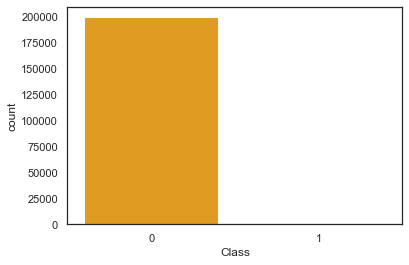

In [48]:
sns.countplot(x = "Class" , data = data_train , color = "orange") 

# Decision Tree Model 

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [52]:
X_train

,V28,V6,V13,V8,V14,V15,V20,V25,V3,V7,...,V12,V16,V10,V26,V22,V5,V19,V27,V4,V23
19882,0.019545,-0.849912,0.063098,-0.117419,0.076379,0.015495,0.214134,0.414817,0.450127,-0.508023,...,0.159828,1.249910,0.770816,-0.244891,0.463601,-1.172713,0.707894,-0.012273,-0.656490,-0.092708
28627,0.376354,-0.944462,1.540066,-0.332107,-0.775479,0.322808,0.205705,-0.057352,0.169687,0.855199,...,0.845622,0.254932,1.730961,0.090911,0.090349,-0.580318,-0.895217,-0.902677,-0.792852,0.113117
252282,-0.023058,-1.438944,-0.174029,-0.496164,0.603560,1.134597,-0.288116,0.297133,-2.307854,0.156930,...,0.309101,-2.868543,-0.450475,-0.743797,-0.100191,-0.549855,0.238295,-0.000465,-2.651533,-0.060454
283094,1.240884,-1.112216,0.837591,3.746472,0.303558,-0.837132,3.406673,1.492283,-6.591644,-2.164932,...,2.152466,0.660813,8.319900,0.295328,-1.425127,-3.135762,-0.428189,2.177236,-2.460064,0.660345
201431,0.500579,7.801221,-1.597984,-16.942606,2.856969,0.747486,4.412495,-0.018582,-2.184592,-9.120091,...,1.987735,1.390717,-4.162672,-0.360751,2.958235,0.423311,-1.423249,-0.005474,-0.978949,1.255257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-0.043576,0.113723,1.510768,0.175389,-0.812430,0.173482,0.065773,-0.403562,0.234969,-1.656851,...,0.676295,1.957444,0.854955,-0.102502,1.507397,-1.433077,0.427254,0.058842,-1.009783,0.149724
64162,-0.030211,0.985436,-0.029949,0.840939,0.762662,2.043929,-0.302997,-0.495253,0.739050,0.002159,...,0.563880,-1.511864,-0.551364,-0.219312,0.977923,0.401660,-1.329392,0.030910,0.857215,0.093360
174179,-0.098112,0.750053,0.232185,0.052156,0.565906,0.066012,-0.036445,0.315080,-2.583758,-0.087291,...,0.117809,-0.023609,0.948242,0.158558,1.293620,1.135523,0.139524,-0.041218,-1.422633,-0.064980
268687,-0.062229,-1.245778,-1.061793,-0.271768,0.499747,0.162736,-0.296357,-0.337683,-1.084477,0.108868,...,-0.156386,-0.055036,0.106223,0.199131,-0.789625,-0.248828,0.150298,-0.078106,0.429631,0.354650


In [53]:
Y_train

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

In [54]:
dt = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 5) 
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [55]:
pred_y_train = dt.predict(X_train)
pred_Y_train_proba = dt.predict_proba(X_test)

In [56]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.05):
    y_pred = (pred_Y_train_proba [:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,pred_y_train).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [57]:
table # Threshold at 0.5

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.05,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.10,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.15,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.20,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.25,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.30,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.35,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.40,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301
0.45,0.999599,0.798883,0.99996,0.972789,0.798883,0.877301


Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

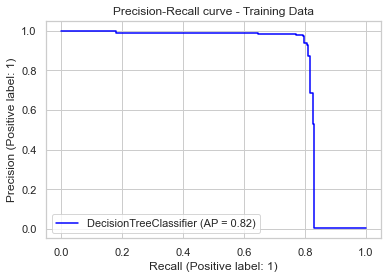

In [58]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(dt, X_train, Y_train, color = "blue")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for unbalanced Train Data

Testing the new model on the Testing DataSet

In [59]:
pred_y = dt.predict(X_test)

In [60]:
pred_Y_test_proba = dt.predict_proba(X_test)

In [61]:
pred_prob_y = pred_Y_test_proba[:,1]

In [62]:
y_test_pred = (pred_prob_y > 0.5).astype(int) #Threshold selected Based on the above precision vs recall curve

In [63]:
tn, fp, fn, tp = confusion_matrix(Y_test,y_test_pred).ravel()

In [64]:
tn, fp, fn, tp #Similar result as the previous model

(85290, 19, 28, 106)

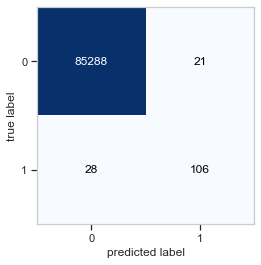

In [65]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[85288, 21],[28, 106]])
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

Now we check the Precision and Recall metrics of our new model 

In [66]:
precision, recall, threshold = precision_recall_curve(Y_test,pred_y)

In [67]:
precision, recall, threshold # As you can see there is a drastic improvement in our precision metric.

(array([0.0015683, 0.848    , 1.       ]),
 array([1.        , 0.79104478, 0.        ]),
 array([0, 1]))

Text(0.5, 1.0, 'Precision-Recall curve - Testing Data')

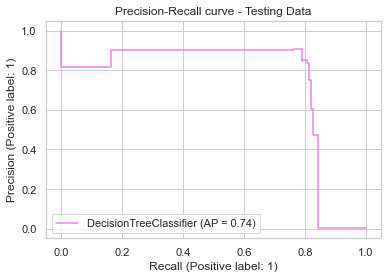

In [68]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(dt, X_test, Y_test, color = "violet")
disp.ax_.set_title('Precision-Recall curve - Testing Data') 
#Precision vs Recall Curve for Test

In [69]:
# We continue to find the best classification model without balancing the dataset and by using Precision and recall as the metric of measure.

# Logistic Regression Model

In [70]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [72]:
pred_Y_lr = lr.predict(X_train)

In [73]:
pred_Y_lr_proba = lr.predict_proba(X_train)

In [74]:
lr_proba = pred_Y_lr_proba[:,1]

In [75]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table2 = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.05):
    y_pred = (pred_Y_lr_proba [:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,y_pred).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table2.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [76]:
table2

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,0.001796,1.000000,0.000000,0.001796,1.000000,0.003585
0.05,0.999132,0.810056,0.999472,0.734177,0.810056,0.770252
0.10,0.999273,0.782123,0.999663,0.806916,0.782123,0.794326
0.15,0.999318,0.770950,0.999729,0.836364,0.770950,0.802326
0.20,0.999318,0.756983,0.999754,0.846875,0.756983,0.799410
0.25,0.999293,0.740223,0.999759,0.846645,0.740223,0.789866
0.30,0.999288,0.726257,0.999779,0.855263,0.726257,0.785498
0.35,0.999268,0.706704,0.999794,0.860544,0.706704,0.776074
0.40,0.999263,0.689944,0.999819,0.872792,0.689944,0.770671
0.45,0.999298,0.675978,0.999879,0.909774,0.675978,0.775641


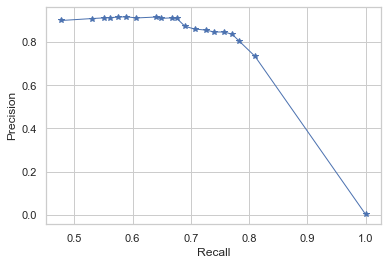

In [77]:
plt.plot(table2.Recall, table2.Precision , marker = "*", linewidth = 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.style.use("fivethirtyeight")
plt.show()
# Plot between Precision and Recall 

In [78]:
#Based on the above table we can select a threshold of 0.5

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

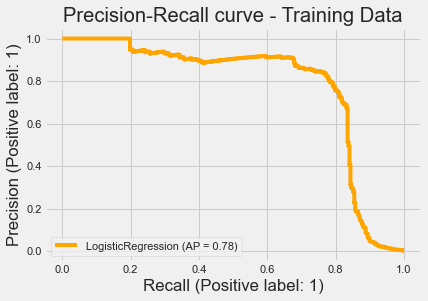

In [79]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train

In [80]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [81]:
precision, recall, threshold = precision_recall_curve(Y_train,pred_Y_lr)

In [82]:
precision, recall, threshold

(array([0.00179571, 0.91221374, 1.        ]),
 array([1.        , 0.66759777, 0.        ]),
 array([0, 1]))

In [83]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [84]:
precision, recall, _ = precision_recall_curve(Y_train, pred_Y_lr)
auc_score = auc(recall, precision)
print('Logistic Regression AUC: %.3f' % auc_score)

Logistic Regression AUC: 0.790


In [85]:
pred_Y_lr_test = lr.predict(X_test)

In [86]:
pred_Y_lr_test_proba = lr.predict_proba(X_test)

In [87]:
lr_proba_test = pred_Y_lr_test_proba[:,1]

In [88]:
tn, fp, fn, tp = confusion_matrix(Y_test,pred_Y_lr_test).ravel()

In [89]:
tn, fp, fn, tp

(85281, 28, 43, 91)

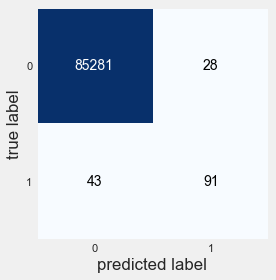

In [90]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[85281, 28],[43, 91]])
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [91]:
precision, recall, threshold = precision_recall_curve(Y_test,pred_Y_lr_test)

In [92]:
precision, recall, threshold

(array([0.0015683 , 0.76470588, 1.        ]),
 array([1.        , 0.67910448, 0.        ]),
 array([0, 1]))

Text(0.5, 1.0, 'Precision-Recall curve - Test Data')

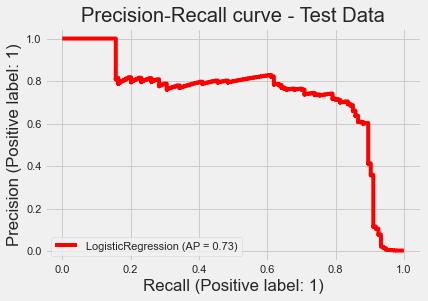

In [93]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Test Data') 
#Precision vs Recall Curve for Test Data

# Random Forest

In [94]:
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [95]:
X_train

,V28,V6,V13,V8,V14,V15,V20,V25,V3,V7,...,V12,V16,V10,V26,V22,V5,V19,V27,V4,V23
19882,0.019545,-0.849912,0.063098,-0.117419,0.076379,0.015495,0.214134,0.414817,0.450127,-0.508023,...,0.159828,1.249910,0.770816,-0.244891,0.463601,-1.172713,0.707894,-0.012273,-0.656490,-0.092708
28627,0.376354,-0.944462,1.540066,-0.332107,-0.775479,0.322808,0.205705,-0.057352,0.169687,0.855199,...,0.845622,0.254932,1.730961,0.090911,0.090349,-0.580318,-0.895217,-0.902677,-0.792852,0.113117
252282,-0.023058,-1.438944,-0.174029,-0.496164,0.603560,1.134597,-0.288116,0.297133,-2.307854,0.156930,...,0.309101,-2.868543,-0.450475,-0.743797,-0.100191,-0.549855,0.238295,-0.000465,-2.651533,-0.060454
283094,1.240884,-1.112216,0.837591,3.746472,0.303558,-0.837132,3.406673,1.492283,-6.591644,-2.164932,...,2.152466,0.660813,8.319900,0.295328,-1.425127,-3.135762,-0.428189,2.177236,-2.460064,0.660345
201431,0.500579,7.801221,-1.597984,-16.942606,2.856969,0.747486,4.412495,-0.018582,-2.184592,-9.120091,...,1.987735,1.390717,-4.162672,-0.360751,2.958235,0.423311,-1.423249,-0.005474,-0.978949,1.255257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-0.043576,0.113723,1.510768,0.175389,-0.812430,0.173482,0.065773,-0.403562,0.234969,-1.656851,...,0.676295,1.957444,0.854955,-0.102502,1.507397,-1.433077,0.427254,0.058842,-1.009783,0.149724
64162,-0.030211,0.985436,-0.029949,0.840939,0.762662,2.043929,-0.302997,-0.495253,0.739050,0.002159,...,0.563880,-1.511864,-0.551364,-0.219312,0.977923,0.401660,-1.329392,0.030910,0.857215,0.093360
174179,-0.098112,0.750053,0.232185,0.052156,0.565906,0.066012,-0.036445,0.315080,-2.583758,-0.087291,...,0.117809,-0.023609,0.948242,0.158558,1.293620,1.135523,0.139524,-0.041218,-1.422633,-0.064980
268687,-0.062229,-1.245778,-1.061793,-0.271768,0.499747,0.162736,-0.296357,-0.337683,-1.084477,0.108868,...,-0.156386,-0.055036,0.106223,0.199131,-0.789625,-0.248828,0.150298,-0.078106,0.429631,0.354650


In [96]:
Y_train

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

In [97]:
X_test

,V28,V6,V13,V8,V14,V15,V20,V25,V3,V7,...,V12,V16,V10,V26,V22,V5,V19,V27,V4,V23
259433,-0.331451,1.581294,0.165142,-0.865043,-1.484028,-0.299823,0.115547,0.242397,3.110827,-0.317032,...,0.247109,-1.728057,0.223917,-0.119337,0.207495,-0.689090,2.853027,-0.141732,2.324735,-0.281702
227002,-0.291331,-0.346329,-1.409582,0.075183,1.215360,0.506785,-0.401661,0.733008,-0.865200,1.457932,...,-0.317460,-2.026251,-0.911713,-0.135713,1.455308,1.961462,-1.083420,-0.258377,-0.848797,-0.698171
251070,-0.046461,-0.025683,0.751318,-0.140235,-0.171709,-1.577461,-0.228282,0.141246,-0.508213,0.203307,...,0.371409,0.348085,1.339440,0.095659,0.491255,0.322487,-1.428012,-0.020601,3.947951,0.064040
139521,0.145102,-0.320048,-0.035951,0.770526,-0.137933,2.329116,0.943083,0.013191,2.122701,-2.390253,...,-0.961439,-1.895343,0.961597,0.134819,0.686935,1.448666,-1.243014,-0.005766,-0.809990,0.993696
200788,-0.105054,-0.764345,-1.896512,-0.306500,1.336235,-0.689785,-0.293807,0.695226,-2.793449,0.755034,...,-0.359194,-0.318070,0.483912,0.713796,0.762966,1.153068,0.552268,-0.145902,0.176678,-0.222853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157536,-0.065529,-0.617706,0.354799,-0.161290,2.357899,-0.405404,-0.340792,0.248627,-1.286251,-0.113620,...,-2.167954,-0.057697,-0.264322,-0.509975,0.745847,0.188332,-0.112781,-0.035013,0.298705,0.035655
42920,0.005636,-0.822739,-0.669037,-0.101830,0.501986,1.243708,-0.193914,0.368969,0.348119,0.026948,...,0.017113,-0.219660,-0.062607,0.514849,0.143778,-0.420841,-0.642177,-0.036199,0.579985,0.022221
26195,0.283098,-0.270753,0.128284,0.348135,-0.323272,0.426360,0.182743,-1.290582,1.864177,-0.785410,...,0.412283,-0.608182,-0.244151,-0.518699,0.702957,0.540870,0.156111,0.310683,1.379820,0.362454
84510,0.016326,-0.290401,-0.505368,0.117051,0.062793,0.714861,-0.136052,0.091323,0.281367,-0.133083,...,0.674040,0.413178,-0.140746,0.108652,-0.656455,-0.184162,-0.262754,-0.015027,0.535220,0.151210


In [98]:
Y_test

259433    0
227002    0
251070    0
139521    0
200788    0
         ..
157536    0
42920     0
26195     0
84510     0
29917     0
Name: Class, Length: 85443, dtype: int64

In [99]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [100]:
rf1 = RandomForestClassifier(n_estimators=2, max_depth=5, random_state=0)
rf1.fit(X_train, Y_train)

rf2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf2.fit(X_train, Y_train)

rf3 = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=0)
rf3.fit(X_train, Y_train)

rf4 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0)
rf4.fit(X_train, Y_train)

rf5 = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=0)
rf5.fit(X_train, Y_train)

rf6 = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=0)
rf6.fit(X_train, Y_train)

rf7 = RandomForestClassifier(n_estimators=35, max_depth=5, random_state=0)
rf7.fit(X_train, Y_train)

rf8 = RandomForestClassifier(n_estimators=40, max_depth=5, random_state=0)
rf8.fit(X_train, Y_train)

rf9 = RandomForestClassifier(n_estimators=45, max_depth=5, random_state=0)
rf9.fit(X_train, Y_train)

rf10 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
rf10.fit(X_train, Y_train)

rf11 = RandomForestClassifier(n_estimators=75, max_depth=5, random_state=0)
rf11.fit(X_train, Y_train)

rf12 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf12.fit(X_train, Y_train)

rf13 = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=0)
rf13.fit(X_train, Y_train)

rf14 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
rf14.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)

In [101]:
pred_Y_rf1 = rf1.predict(X_test)
pred_Y_rf2 = rf2.predict(X_test)
pred_Y_rf3 = rf3.predict(X_test)
pred_Y_rf4 = rf4.predict(X_test)
pred_Y_rf5 = rf5.predict(X_test)
pred_Y_rf6 = rf6.predict(X_test)
pred_Y_rf7 = rf7.predict(X_test)
pred_Y_rf8 = rf8.predict(X_test)
pred_Y_rf9 = rf9.predict(X_test)
pred_Y_rf10 = rf10.predict(X_test)
pred_Y_rf11 = rf11.predict(X_test)
pred_Y_rf12 = rf12.predict(X_test)
pred_Y_rf13 = rf13.predict(X_test)
pred_Y_rf14 = rf14.predict(X_test)

In [102]:
accuracy_rf1, sensitivity_rf1, specificity_rf1 = get_performance(Y_test, pred_Y_rf1)
accuracy_rf2, sensitivity_rf2, specificity_rf2 = get_performance(Y_test, pred_Y_rf2)
accuracy_rf3, sensitivity_rf3, specificity_rf3 = get_performance(Y_test, pred_Y_rf3)
accuracy_rf4, sensitivity_rf4, specificity_rf4 = get_performance(Y_test, pred_Y_rf4)
accuracy_rf5, sensitivity_rf5, specificity_rf5 = get_performance(Y_test, pred_Y_rf5)
accuracy_rf6, sensitivity_rf6, specificity_rf6 = get_performance(Y_test, pred_Y_rf6)
accuracy_rf7, sensitivity_rf7, specificity_rf7 = get_performance(Y_test, pred_Y_rf7)
accuracy_rf8, sensitivity_rf8, specificity_rf8 = get_performance(Y_test, pred_Y_rf8)
accuracy_rf9, sensitivity_rf9, specificity_rf9 = get_performance(Y_test, pred_Y_rf9)
accuracy_rf10, sensitivity_rf10, specificity_rf10 = get_performance(Y_test, pred_Y_rf10)
accuracy_rf11, sensitivity_rf11, specificity_rf11 = get_performance(Y_test, pred_Y_rf11)
accuracy_rf12, sensitivity_rf12, specificity_rf12 = get_performance(Y_test, pred_Y_rf12)
accuracy_rf13, sensitivity_rf13, specificity_rf13 = get_performance(Y_test, pred_Y_rf13)
accuracy_rf14, sensitivity_rf14, specificity_rf14 = get_performance(Y_test, pred_Y_rf14)

In [103]:
perf2 = pd.DataFrame([accuracy_rf1, accuracy_rf2,accuracy_rf3,accuracy_rf4, accuracy_rf5, accuracy_rf6, 
                      accuracy_rf7, accuracy_rf8, accuracy_rf9, accuracy_rf10, accuracy_rf11, accuracy_rf12, 
                      accuracy_rf13,accuracy_rf14], 
                    columns = ['accuracy'], 
                    index = ["RF-1","RF-2","RF-3","RF-4","RF-5","RF-6","RF-7","RF-8","RF-9","RF-10","RF-11","RF-12","RF-13","RF-14",])

perf2['sensitivity'] = np.asarray([sensitivity_rf1,sensitivity_rf2,sensitivity_rf3,sensitivity_rf4,sensitivity_rf5,
                                  sensitivity_rf6, sensitivity_rf7, sensitivity_rf8, sensitivity_rf9, sensitivity_rf10,
                                  sensitivity_rf11,sensitivity_rf12, sensitivity_rf13, sensitivity_rf14])

perf2['specificity'] = np.asarray([specificity_rf1,specificity_rf2, specificity_rf3, specificity_rf4, specificity_rf5,
                                  specificity_rf6,specificity_rf7, specificity_rf8, specificity_rf9, specificity_rf10,
                                   specificity_rf11, specificity_rf12,specificity_rf13, specificity_rf14])

perf2["e"] = np.asarray([2, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 150, 200])

perf2

,accuracy,sensitivity,specificity,e
RF-1,0.999415,0.999801,0.753731,2
RF-2,0.999450,0.999836,0.753731,10
RF-3,0.999415,0.999824,0.738806,15
RF-4,0.999438,0.999836,0.746269,20
RF-5,0.999473,0.999836,0.768657,25
RF-6,0.999485,0.999848,0.768657,30
RF-7,0.999485,0.999859,0.761194,35
RF-8,0.999497,0.999859,0.768657,40
RF-9,0.999485,0.999859,0.761194,45
RF-10,0.999485,0.999859,0.761194,50


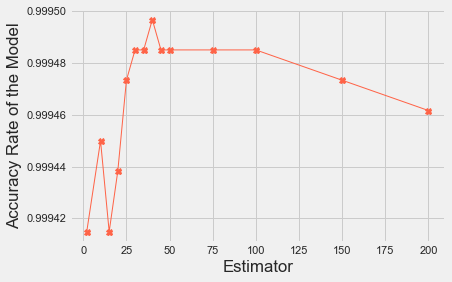

In [104]:
plt.plot(perf2.e,perf2.accuracy, color = "tomato", marker = "X", linewidth = 1)
plt.xlabel("Estimator")
plt.ylabel("Accuracy Rate of the Model")
plt.style.use("fivethirtyeight")
plt.show()

In [105]:
# n_estimators = 100 
# This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees give you better performance but makes your code slower. 
# You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.
# Here The curve becomes uniform at 100

In [106]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [107]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [108]:
pred_Y_rf_train = rf.predict(X_train)

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

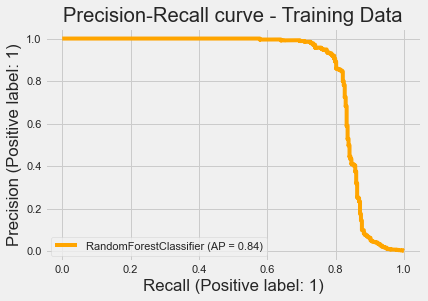

In [109]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train

In [110]:
precision, recall, threshold = precision_recall_curve(Y_train,pred_Y_rf_train)

In [111]:
precision, recall, threshold

(array([0.00179571, 0.95683453, 1.        ]),
 array([1.        , 0.74301676, 0.        ]),
 array([0, 1]))

In [112]:
pred_Y_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Precision-Recall curve - Testing Data')

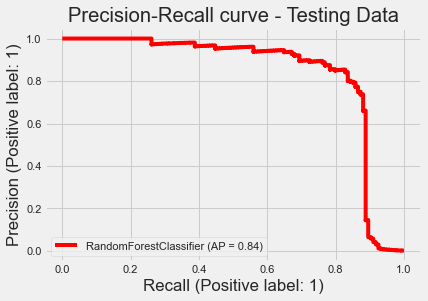

In [113]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Testing Data') 
#Precision vs Recall Curve for Test

In [114]:
precision, recall, threshold = precision_recall_curve(Y_test,pred_Y_rf)

In [115]:
precision, recall, threshold

(array([0.0015683 , 0.89473684, 1.        ]),
 array([1.        , 0.76119403, 0.        ]),
 array([0, 1]))

In [116]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
feature_imp

V17                     0.188902
V12                     0.152605
V10                     0.121448
V14                     0.119783
V11                     0.119237
V16                     0.074811
V9                      0.034496
V18                     0.027801
V7                      0.026090
V4                      0.024238
V6                      0.010700
V2                      0.010112
V26                     0.009072
V21                     0.008666
V8                      0.007681
V5                      0.007400
V3                      0.007014
V20                     0.006399
V1                      0.005597
V27                     0.005579
V28                     0.004497
Time_ Standardized      0.004463
V22                     0.003804
Amount_ Standardized    0.003793
V19                     0.003661
V25                     0.003376
V24                     0.003341
V23                     0.002289
V15                     0.001935
V13                     0.001210
dtype: flo

No handles with labels found to put in legend.


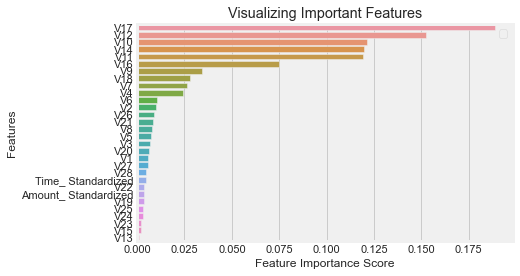

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Naive Bayes Classifier

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
naive = GaussianNB()

In [120]:
naive.fit(X_train, Y_train)  

GaussianNB()

In [121]:
naive_pred = naive.predict(X_train)

In [122]:
naive_pred_prob = naive.predict_proba(X_train)

In [123]:
naive_pred_prob[:,1]

array([4.27988957e-17, 7.31591343e-16, 8.88578621e-16, ...,
       2.04588261e-15, 1.44088829e-18, 1.00000000e+00])

In [124]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table3 = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.05):
    y_pred = (naive_pred_prob[:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,y_pred).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table3.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [125]:
table3

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,0.001796,1.000000,0.000000,0.001796,1.000000,0.003585
0.05,0.975828,0.821229,0.976106,0.058229,0.821229,0.108748
0.10,0.976249,0.815642,0.976538,0.058859,0.815642,0.109795
0.15,0.976475,0.812849,0.976770,0.059219,0.812849,0.110395
0.20,0.976681,0.812849,0.976976,0.059717,0.812849,0.111260
0.25,0.976841,0.812849,0.977136,0.060112,0.812849,0.111945
0.30,0.976972,0.812849,0.977267,0.060436,0.812849,0.112507
0.35,0.977052,0.812849,0.977347,0.060638,0.812849,0.112856
0.40,0.977137,0.812849,0.977433,0.060853,0.812849,0.113230
0.45,0.977298,0.812849,0.977594,0.061263,0.812849,0.113939


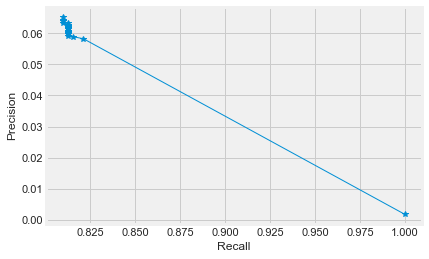

In [126]:
plt.plot(table3.Recall, table3.Precision , marker = "*", linewidth = 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.style.use("fivethirtyeight")
plt.show()
# Plot between Precision and Recall 

In [127]:
naive_pred_test = naive.predict(X_test)

In [128]:
tn, fp, fn, tp = confusion_matrix(Y_test,naive_pred_test).ravel()

In [129]:
tn, fp, fn, tp #Threshold of 0.5

(83425, 1884, 17, 117)

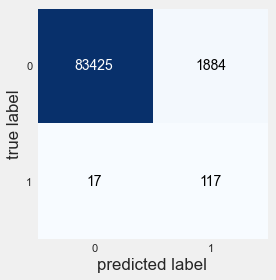

In [130]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[83425, 1884],[17, 117]])
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

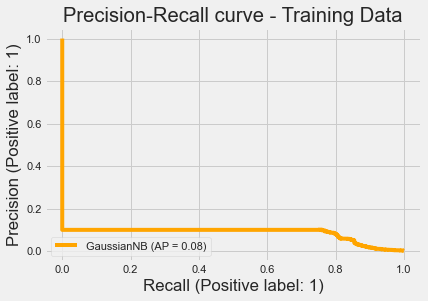

In [131]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(naive, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train Data

In [132]:
precision, recall, threshold = precision_recall_curve(Y_test,naive_pred_test)

In [133]:
precision, recall, threshold  

(array([0.0015683 , 0.05847076, 1.        ]),
 array([1.        , 0.87313433, 0.        ]),
 array([0, 1]))

Text(0.5, 1.0, 'Precision-Recall curve - Test Data')

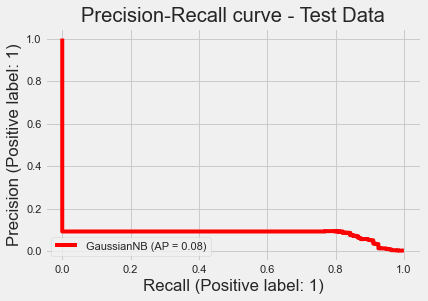

In [134]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(naive, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Test Data') 
#Precision vs Recall Curve for Test Data

In [135]:
#Though the Naive Bayes Model performs well interms of Accuracy but it is poor interms of Precsion.

# Performance Summary & Model Selection

In [136]:
def detailed_stats(X_test, Y_train, Y_test, y_pred, clf):
    
    scores = cross_val_score(clf, X_test, Y_test, cv=5)
    score = np.mean(scores)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    fpr = fp/(fp+tn)
    precision = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    fmeasure = (2*precision*sensitivity) /(precision+sensitivity)
    return [score, accuracy, sensitivity, specificity, fpr, precision, fmeasure]

In [137]:
models_list = [lr,dt, rf, naive]
index = ['Logistic Regression','Decision Tree', 'Random Forest', 'Naive Bayes']
prediction_list = [pred_Y_lr_test, pred_y,pred_Y_rf ,naive_pred_test]
performance = pd.DataFrame(columns = ['CV_Score', 'Accuracy', 'Sensitivity','Specificity', 'fpr', 'Precision', 'FMeasure'])
for id, model in enumerate(models_list):
    performance.loc[index[id]] = detailed_stats(X_test, Y_train, Y_test, prediction_list[id], model)
performance

,CV_Score,Accuracy,Sensitivity,Specificity,fpr,Precision,FMeasure
Logistic Regression,0.999064,0.999169,0.679104,0.999672,0.000328,0.764706,0.719368
Decision Tree,0.999356,0.999450,0.791045,0.999777,0.000223,0.848000,0.818533
Random Forest,0.999438,0.999485,0.761194,0.999859,0.000141,0.894737,0.822581
Naive Bayes,0.979355,0.977751,0.873134,0.977916,0.022084,0.058471,0.109602


<AxesSubplot:xlabel='index'>

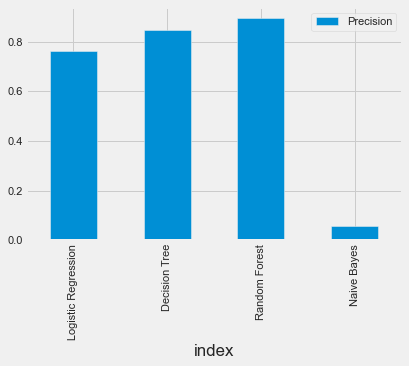

In [140]:
# Accuracy and Cross validation score Graph
performance.reset_index().plot(x='index' ,y=['Precision'],kind='bar')